<a href="https://colab.research.google.com/github/Devansh1093/Devansh1093/blob/main/SimpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [73]:
#Create a Model class that inherits nn.Module
class Model(nn.Module):
  #input layer(4 features of flower)-> Hidden layer1--> H2--> ouptut(3 classes of flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()# instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [7]:
torch.manual_seed(41)
Model = Model()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [12]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
my_df['variety'] = my_df['variety'].replace('Setosa',0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1)
my_df['variety'] = my_df['variety'].replace('Virginica',2)
my_df

/tmp/ipython-input-3759283143.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
#Train Test Split  Set X,y
# X is the features
#y is output
# .values converts it into numpy arrays
X= my_df.drop('variety',axis=1).values
y = my_df['variety'].values

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [19]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
# Now set the criterion of model to measure the error, how far off the predictions are from
criterion = nn.CrossEntropyLoss()
#Choose Optimizer, lr = learning rate(if error doesn't go down after a bunch of iteration(spooch), lower our learning rate )
optimizer = torch.optim.Adam(Model.parameters(),lr =0.01)



In [43]:
#Train our model
#Epooch?(one run thru all the training data in our network)
epooch = 100
losses = []
for i in range(epooch):
  y_pred = Model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0:

    print(f'Epooch: {i} Loss: {loss}')

# NOW BACKPROPGATION
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epooch: 0 Loss: 0.000280779815511778
Epooch: 10 Loss: 0.00027584476629272103
Epooch: 20 Loss: 0.0002710238331928849
Epooch: 30 Loss: 0.00026631218497641385
Epooch: 40 Loss: 0.000261704990407452
Epooch: 50 Loss: 0.0002572151424828917
Epooch: 60 Loss: 0.00025282689603045583
Epooch: 70 Loss: 0.0002485353616066277
Epooch: 80 Loss: 0.00024434260558336973
Epooch: 90 Loss: 0.00024024276353884488


Text(0.5, 0, 'Epooch')

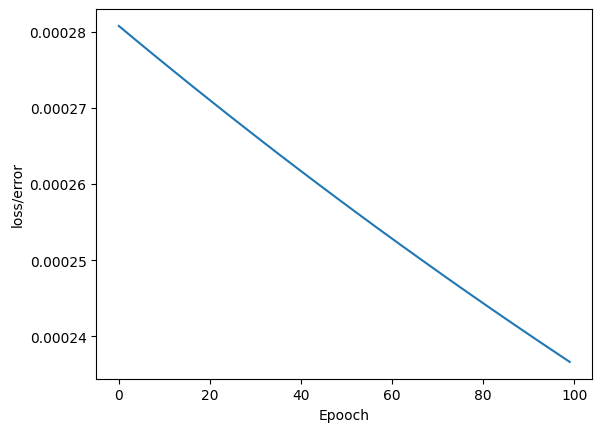

In [44]:
plt.plot(range(epooch),losses)
plt.ylabel("loss/error")
plt.xlabel("Epooch")

In [45]:
#Evaluate Model on Test Data Set(validate model on test set)
with torch.no_grad():    #Basically turn off back prop
  y_eval = Model.forward(X_test)
  loss = criterion(y_eval,y_test)
  print(loss)

tensor(0.9538)


In [47]:
correct =0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = Model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}%')

 1. tensor([-12.0064,  -2.1210,  23.5191]) 2
 2. tensor([-15.4761,  -7.8308,  35.1969]) 2
 3. tensor([-17.8994,  -8.2879,  39.6759]) 2
 4. tensor([ 20.4794,  34.5579, -27.6873]) 1
 5. tensor([-15.0072,  -5.0881,  31.5673]) 2
 6. tensor([ 35.2602,  49.1337, -49.0127]) 1
 7. tensor([-10.3012,   0.7584,  20.6353]) 2
 8. tensor([ 21.6384,  35.8750, -29.4900]) 1
 9. tensor([-13.6334,  -3.0792,  27.2054]) 2
10. tensor([-16.5693,  -8.5118,  37.7195]) 2
11. tensor([-5.7187,  5.5835, 13.3745])    2
12. tensor([ 148.5576,  135.6178, -186.8655]) 0
13. tensor([ 134.9895,  122.9824, -169.7045]) 0
14. tensor([ 41.6947,  51.4664, -56.6061]) 1
15. tensor([ 129.9051,  120.7625, -164.0951]) 0
16. tensor([ 1.1928, 13.3629,  2.6302])    2
17. tensor([ 136.3960,  124.8823, -171.6879]) 0
18. tensor([-9.4037,  1.1368, 19.0174])    1
19. tensor([ 155.7112,  141.2287, -195.5159]) 0
20. tensor([ 118.1859,  109.4173, -149.1575]) 0
21. tensor([ 40.1228,  51.6498, -55.1140]) 1
22. tensor([-16.1478,  -7.0823,  35.5

In [48]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])


In [50]:
with torch.no_grad():
  print(Model(new_iris))

tensor([ 143.1006,  130.3398, -179.8929])


In [80]:
#Save our NN Model
torch.save(Model.state_dict(),'Irisdataset.pt')


TypeError: Module.state_dict() missing 1 required positional argument: 'self'

In [81]:
#Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('Irisdataset.pt'))

<All keys matched successfully>

In [82]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [70]:
# # Re-run the Model class definition
# # Create a Model class that inherits nn.Module
# class Model(nn.Module):
#   #input layer(4 features of flower)-> Hidden layer1--> H2--> ouptut(3 classes of flowers)
#   def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
#     super().__init__()# instantiate our nn.Module
#     self.fc1 = nn.Linear(in_features,h1)
#     self.fc2 = nn.Linear(h1,h2)
#     self.out = nn.Linear(h2,out_features)
#   def forward(self,x):
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = self.out(x)
#     return x

# # Load the Saved Model again after redefining the class
# new_model = Model()
# new_model.load_state_dict(torch.load('Irisdataset.pt'))

# print("Model loaded successfully!")

Model loaded successfully!


In [76]:
# # Evaluate the loaded model
# new_model.eval()

# with torch.no_grad():
#   new_iris = torch.tensor([4.7,3.2,1.3,0.2])
#   output = new_model(new_iris)
#   print(f"Prediction for new_iris: {output}")
#   # You can also get the predicted class
#   predicted_class = torch.argmax(output).item()
#   print(f"Predicted class index: {predicted_class}")

Prediction for new_iris: tensor([ 143.1006,  130.3398, -179.8929])
Predicted class index: 0
